## Introduction

Before getting into the project, just a few words about my journey in Data Science: 

I made a decision to start learning about this field in Mar/18 after some time thinking about on what to do with my life. Great! Decision made, but where to start? I studied Economics in Uni and had almost zero knowledge about Python and Machine Learning, so, while making some research I found some videos that helped me come up with a study plan to learn the basics around 6 months.
The plan consisted of:

First: Learn Python
<br>Second: Improve knowledge in main libraries for Data Analysis
<br>Third: Machine Learning and review Statistics

Despite all the advices to create your own projects, I spent most of my time practicing in datasets that were almost ready, Kaggle...Also, I had some doubts on what to do for my first project and ended up overthinking it, and finally I thought that the most important thing was to just start it. So here we are.

## Objective

While listening to music and trying to find a theme to a project that would consist in collecting data, web scrapping, interacting with API and analysing the final dataset, I decided to do it about music!

With this project I want to see how music changed in USA over time by analysing the Billboard Year End Hot 100 singles from 1960 to 2017. Being a bit more specific:

- Which genres were more famous throughout decades
- Which artists were behind the most popular songs, where they were from, how old they were, their gender...
- Initially thought about analysing the songs' lyrics, but, thanks to Spotify we can see if the tracks are getting happier,more danceable, louder, more energetic,among other aspects.


##### I created playlists with around 100 songs of each decade, just in case you get curious and feel like listening to what was getting into Billboard's lists at those periods

Music Evolution Project -2010s
<br>https://open.spotify.com/playlist/6E6Ghbu4XFMqx7I6qxgDsz

Music Evolution Project -2000s
<br>https://open.spotify.com/playlist/68rJDpsZczcssRi6g8TekC

Music Evolution Project - 1990s
<br>https://open.spotify.com/playlist/3ZmKU13GN2MPYk3Y4SM49D

Music Evolution Project - 1980s
<br>https://open.spotify.com/playlist/0R8KUmTzcfLWLPyy29ZWw3

Music Evolution Project - 1970s
<br>https://open.spotify.com/playlist/0BcozBCOJ2Fzp1gyycnOxt

Music Evolution Project - 1960s
<br>https://open.spotify.com/playlist/7LB9sY2Jo6NHXdSSBUratV

## Building the Dataset

The data will be from Wikipedia, Wikidata and Spotify 

### Step 1: Billboard Year End Hot 100 singles from 1960 to 2017 from Wikipedia

In [1]:
# main libraries and functions used 
from bs4 import BeautifulSoup
from urllib.request import urlopen
from time import sleep
import re
import pandas as pd
import numpy as np
import spotipy
import matplotlib.pyplot as plt
% matplotlib notebook
from IPython.core.pylabtools import figsize
import seaborn as sns

The next few entries are just some functions to collect the Billboard's lists from Wikipedia

In [2]:
# creates beautiful soup object
def make_soup(url):
    html = urlopen(url).read()
    return BeautifulSoup(html, 'lxml')

In [3]:
# Since there was a year with a revised list, this function selects the right one
def prepare_parse(soup):
    if soup.find('span',{'id':'Revised_list'}) == None:
        return soup.find('table','wikitable')
    else:
        return soup.find_all('table','wikitable')[1]

After having the right list, there is still the need to select the information needed to the project. Two functions will be used for that: extract_type_1 and extract_type_2. The reason for having two functions is a change in HTML structure in 1982. So the first will get data from 1960 to 1981, and the other one for the remaining period

In [4]:
def extract_type_1(trecho,year):
    for item in trecho.tbody:
        if item != '\n':
            tag = item.find_all('td')
            if tag != []:    
                year_list.append(year)
                pos_list.append(tag[0].string)
                music_list.append(re.sub(r'\"', "",tag[1].get_text()))
                art_list.append(tag[2].get_text().replace('\n',""))
                               
                if tag[1].find_all('a') == []:
                    link_music.append(np.nan)
                else:
                    link_music.append(tag[1].a['href'])
            
                tam = len(tag[2].find_all('a')) 
                
                if tam == 0:
                    link_artist.append(np.nan)
                    names_list.append(tag[2].get_text().replace('\n',""))
                elif tam == 1:
                    link_artist.append(tag[2].a['href'])
                    names_list.append(tag[2].get_text().replace('\n',""))
                else:    
                    temp = []
                    temp_n =[]
                    prev = tag[2].find_all('a')
                    for i in range(tam):
                        temp.append(prev[i]['href'])
                        temp_n.append(prev[i].get_text())
                    link_artist.append(temp)
                    names_list.append(temp_n)

In [5]:
def extract_type_2(trecho,year):
    for item in trecho.tbody:
        if item != '\n':
            tag = item.find_all('td')
            if tag != []:
                ranking = item.get_text().split('\n')
                year_list.append(year)
                pos_list.append(ranking[1])
                art_list.append(ranking[4])
                music_list.append(re.sub(r'\"', "",ranking[3]))
                
                if tag[0].find_all('a') == []:
                    link_music.append(np.nan)
                else:
                    link_music.append(tag[0].a['href'])
            
                tam = len(tag[1].find_all('a')) 
                if tam == 0:
                    link_artist.append(np.nan)
                    names_list.append(ranking[4])
                elif tam == 1:
                    link_artist.append(tag[1].a['href'])
                    names_list.append(tag[1].get_text().replace('\n',''))
                else:    
                    temp = []
                    temp_n = []
                    prev = tag[1].find_all('a')
                    for i in range(tam):
                        temp.append(prev[i]['href'])
                        temp_n.append(prev[i].get_text())
                    link_artist.append(temp)
                    names_list.append(temp_n)

In [6]:
year_list = []
pos_list = []
art_list = []
names_list = []
music_list = []
link_music = []
link_artist = []

In [7]:
base_url = "https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{}"

In [11]:
for year in range(1960,2018):
    top_year = base_url.format(str(year))
    sopa = make_soup(top_year)
    final = prepare_parse(sopa)
    if year < 1982:
        extract_type_1(final,year)
    else:    
        extract_type_2(final,year)
    sleep(1)     

In [12]:
data = pd.DataFrame({'year':year_list,'rank':pos_list,'artist':art_list,'track':music_list,'names':names_list,'link_m':link_music,'link_a':link_artist})

In the cell bellow we can see the resulting data frame. Aside from the normal list, which consists of the year, rank, artist and track, it was also necessary to collect artists' names, since we can have more than one per song, just like in the last row of the data frame, and the artists' wikepedia path, which we will need to get info about them afterwards

In [13]:
data.tail()

,year,rank,artist,track,names,link_m,link_a
5796,2017,96,Camila Cabello featuring Young Thug,Havana,"[Camila Cabello, Young Thug]",/wiki/Havana_(Camila_Cabello_song),"[/wiki/Camila_Cabello, /wiki/Young_Thug]"
5797,2017,97,Maroon 5 featuring SZA,What Lovers Do,"[Maroon 5, SZA]",/wiki/What_Lovers_Do,"[/wiki/Maroon_5, /wiki/SZA_(singer)]"
5798,2017,98,Blackbear,Do Re Mi,Blackbear,/wiki/Do_Re_Mi_(Blackbear_song),/wiki/Blackbear_(musician)
5799,2017,99,XXXTentacion,Look at Me!,XXXTentacion,/wiki/Look_at_Me_(XXXTentacion_song),/wiki/XXXTentacion
5800,2017,100,Keith Urban featuring Carrie Underwood,The Fighter,"[Keith Urban, Carrie Underwood]",/wiki/The_Fighter_(Keith_Urban_song),"[/wiki/Keith_Urban, /wiki/Carrie_Underwood]"


In [17]:
# Since we have 58 years and supposedly 100 songs per year, it is strange that our data frame ended up with 5801 rows.
# We will have a look in the missing data in the 'link_a' column after. For this study, I will not use column 'link_m'

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 7 columns):
year      5801 non-null int64
rank      5801 non-null object
artist    5801 non-null object
track     5801 non-null object
names     5801 non-null object
link_m    5632 non-null object
link_a    5798 non-null object
dtypes: int64(1), object(6)
memory usage: 317.3+ KB


In [18]:
# There should be only 100 songs placed in position 97
data['rank'].describe()

count     5801
unique     101
top         97
freq        59
Name: rank, dtype: object

In [21]:
# In one year we got a tie for the 100th place, resulting in 101 singles in that list and explaining why 5801 entries
# As the song came as 'Tie', we are changing it to 100
data.loc[1000,'rank'] = '100'

In [22]:
# Transforming 'rank' column in integers just in case we want to see the average rank of singles from a certain artist
data['rank'] = data['rank'].apply(lambda x: int(x))

In [6]:
# Fixing the two 97 places in 1975

data.loc[1598,'rank'] = 98

In [23]:
# Including a column for decades to help in the analysis

data['decade'] = pd.cut(data['year'],bins=[1959,1969,1979,1989,1999,2009,2017],labels = ['1960s','1970s','1980s','1990s',
                                                                                         '2000s','2010s'])

In [8]:
# always good to save the data frame so you don't need to web scrape again
data.to_pickle('data_wiki.csv')

### Step 2: Get artists' info, like genre, popularity, gender and others

First, a new data frame with an entry for every artist has to be created. For example, in our first data frame there was an entry for the song 'The Fighter' from Keith Urban featuring Carrie Underwood. Our goal is to make one row for each artist in a song.

In [9]:
list_link = []
list_names = []
list_songs = []
list_feat = []
list_rank = []
list_year = []
list_decade = []

In [10]:
for idx in range(len(data)):
    if type(data.loc[idx,'link_a']) == list:
        i = len(data.loc[idx,'link_a'])
        for item in range(i):
            list_songs.append(data.loc[idx,'track'])
            list_rank.append(data.loc[idx,'rank'])
            list_year.append(data.loc[idx,'year'])
            list_decade.append(data.loc[idx,'decade'])
            list_names.append(data.loc[idx,'names'][item])
            list_link.append(data.loc[idx,'link_a'][item])
            if item > 0:
                list_feat.append(item)
            else:
                list_feat.append(0)

    else:
        list_songs.append(data.loc[idx,'track'])
        list_year.append(data.loc[idx,'year'])
        list_decade.append(data.loc[idx,'decade'])
        list_rank.append(data.loc[idx,'rank'])
        list_names.append(data.loc[idx,'names'])
        list_link.append(data.loc[idx,'link_a'])
        list_feat.append(0)
        

In [11]:
prep_art = pd.DataFrame({'link_a':list_link,'year':list_year,'decade':list_decade,'rank':list_rank,'names':list_names,'track':list_songs,'feat':list_feat})

Bellow we can see the new data frame with information organized in the way we need them. Remember of the song 'The Fighter'? Now it has two entries, one for each artist.

In [12]:
prep_art.tail()

,link_a,year,decade,rank,names,track,feat
6729,/wiki/SZA_(singer),2017,2010s,97,SZA,What Lovers Do,1
6730,/wiki/Blackbear_(musician),2017,2010s,98,Blackbear,Do Re Mi,0
6731,/wiki/XXXTentacion,2017,2010s,99,XXXTentacion,Look at Me!,0
6732,/wiki/Keith_Urban,2017,2010s,100,Keith Urban,The Fighter,0
6733,/wiki/Carrie_Underwood,2017,2010s,100,Carrie Underwood,The Fighter,1


In [13]:
prep_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6734 entries, 0 to 6733
Data columns (total 7 columns):
link_a    6731 non-null object
year      6734 non-null int64
decade    6734 non-null object
rank      6734 non-null int64
names     6734 non-null object
track     6734 non-null object
feat      6734 non-null int64
dtypes: int64(3), object(4)
memory usage: 368.3+ KB


In [14]:
# About those missing 'link_a' data 

prep_art[prep_art['link_a'].isnull()]

,link_a,year,decade,rank,names,track,feat
61,NaN,1960,1960s,61,The Little Dippers,Forever,0
2261,NaN,1982,1980s,8,John Cougar,Hurts So Good,0
3929,NaN,1997,1990s,72,Various Artists,The Jock Jam,0


In [15]:
# John Cougar is the only one that has more than one song. We will fix his link and delete the others NaN.
# By the way John Mellencamp was also know as John Cougar.

prep_art[prep_art['names']=='John Cougar']

,link_a,year,decade,rank,names,track,feat
2212,/wiki/John_Mellencamp,1981,1980s,63,John Cougar,Ain't Even Done With The Night,0
2260,/wiki/John_Mellencamp,1982,1980s,7,John Cougar,Jack & Diane,0
2261,NaN,1982,1980s,8,John Cougar,Hurts So Good,0


In [16]:
prep_art.loc[2261,'link_a'] = '/wiki/John_Mellencamp'

In [17]:
# this entry and the next are about a problem while breaking down the artists behind the songs.
prep_art[prep_art['link_a']=='/wiki/The_New_Power_Generation']

,link_a,year,decade,rank,names,track,feat
3263,/wiki/The_New_Power_Generation,1991,1990s,66,The New Power Generation,Cream,1
3324,/wiki/The_New_Power_Generation,1992,1990s,25,The New Power Generation,Diamonds and Pearls,1
3458,/wiki/The_New_Power_Generation,1993,1990s,52,The New Power Generation,7,1


In [18]:
prep_art[prep_art['link_a']=='/wiki/The_Revolution_(band)']

,link_a,year,decade,rank,names,track,feat
2621,/wiki/The_Revolution_(band),1985,1980s,51,The Revolution,Raspberry Beret,1
2695,/wiki/The_Revolution_(band),1986,1980s,19,The Revolution,Kiss,1


In [19]:
# Both bands end up referring to Prince, so it would double count the artist appearance later on.
prep_art[prep_art['track']=='Kiss']

,link_a,year,decade,rank,names,track,feat
2694,/wiki/Prince_(musician),1986,1980s,19,Prince,Kiss,0
2695,/wiki/The_Revolution_(band),1986,1980s,19,The Revolution,Kiss,1


In [20]:
# deleting the rows mentioned above
prep_art.drop([61,3929,3263,3324,3458,2621,2695],inplace=True)

Before using our new data frame to search for artists' genre, popularity and followers in Spotify, there are some corrections to be made, since some singers/bands have different names for the same wikipedia path (link_a column)

In [21]:
dict_link = {}

In [22]:
for i in prep_art.index:
    if prep_art.loc[i,'link_a'] in dict_link:
        if prep_art.loc[i,'names'] not in dict_link[prep_art.loc[i,'link_a']]:
            dict_link[prep_art.loc[i,'link_a']].append(prep_art.loc[i,'names'])
    else:
        dict_link[prep_art.loc[i,'link_a']] = [prep_art.loc[i,'names']]

In [23]:
correct_names = pd.DataFrame.from_dict(dict_link,orient='index')

In [24]:
# Here it is easier to visualize the problem. We want one path referring to only one name, which lowers the chances
# of problems when we look for them in Spotify

correct_names[correct_names[1].notnull()]

,0,1,2,3
/wiki/Neil_Sedaka,Neil Sedaka,Neil & Dara Sedaka,None,None
/wiki/Ricky_Nelson,Ricky Nelson,Rick Nelson,None,None
/wiki/The_Miracles,The Miracles,Smokey Robinson and the Miracles,None,None
/wiki/Stevie_Wonder,Little Stevie Wonder,Stevie Wonder,None,None
/wiki/The_Fireballs,Jimmy Gilmer and the Fireballs,The Fireballs,None,None
/wiki/Junior_Walker,Junior Walker & the All Stars,Jr. Walker & The All Stars,None,None
/wiki/Frank_Sinatra,Frank Sinatra,Frank,None,None
/wiki/The_Rascals,The Young Rascals,The Rascals,None,None
/wiki/Bee_Gees,The Bee Gees,Bee Gees,None,None
/wiki/Charles_Wright_%26_the_Watts_103rd_Street_Rhythm_Band,The Watts 103rd Street Rhythm Band,Charles Wright & the Watts 103rd Street Rhythm...,None,None


In [25]:
lista_1 = ['/wiki/The_Fireballs','/wiki/Bee_Gees','/wiki/Charles_Wright_%26_the_Watts_103rd_Street_Rhythm_Band','/wiki/Tony_Orlando_and_Dawn',
          '/wiki/Crosby,_Stills,_Nash_%26_Young','/wiki/Paul_McCartney','/wiki/Murray_Head','/wiki/Wings_(band)','/wiki/Charlie_Daniels',
          '/wiki/Heavy_D','/wiki/Snoop_Dogg','/wiki/Lisa_Loeb','/wiki/Matchbox_Twenty','/wiki/Pharrell_Williams','/wiki/Birdman_(rapper)',
           '/wiki/Lil%27_Flip','/wiki/Stevie_Wonder','/wiki/Lil_Jon','/wiki/The_Rascals']
lista_2 = ['/wiki/John_Mellencamp','/wiki/Gloria_Estefan','/wiki/Sean_Combs']
lista_3 = ['/wiki/Bob_Seger']

In [26]:
listas = [lista_1,lista_2,lista_3]

In [27]:
# Placing the correct name in column zero
for i in range(1,4):
    for item in listas[i-1]:
        correct_names.loc[item,0] = correct_names.loc[item,i] 
        

In [28]:
# Deleting the other columns with different names
correct_names.drop([1,2,3],axis=1,inplace=True)

In [29]:
# Last corrections before we search for artists in Spotify API

correct_names.loc['/wiki/Paul_McCartney_and_Wings',0] = 'Wings'
correct_names.loc["/wiki/Pink_(singer)",0] = 'P!nk'
correct_names.loc['/wiki/Prince_and_The_Revolution'] = 'Prince'

In [30]:
dict_names = correct_names.to_dict(orient='index')

In [31]:
def right_names(x):
    return dict_names[x][0]

In [32]:
prep_art['names'] = prep_art['link_a'].map(right_names)

#### Before we search for the artists in Spotify, it is necessary filter down prep_art

In [33]:
# In prep_art an artist with 18 songs will appear 18 times. Since we only need to search for them once in Spotify to get their 
# info, we are creating a data frame with an entry for each link_a with its best ranked song.

wlink_frame = prep_art.loc[prep_art.groupby("link_a")['rank'].idxmin()].reset_index()

In [34]:
wlink_frame.drop('index',axis=1,inplace=True)

In [35]:
wlink_frame.head()

,link_a,year,decade,rank,names,track,feat
0,/wiki/%27N_Sync,2000,2000s,21,'N Sync,Bye Bye Bye,0
1,/wiki/%27Til_Tuesday,1985,1980s,68,'Til Tuesday,Voices Carry,0
2,/wiki/%3F_and_the_Mysterians,1966,1960s,5,? and the Mysterians,96 Tears,0
3,/wiki/.38_Special_(band),1982,1980s,53,.38 Special,Caught Up In You,0
4,"/wiki/10,000_Maniacs",1994,1990s,40,"10,000 Maniacs",Because the Night,0


In [36]:
wlink_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 7 columns):
link_a    2533 non-null object
year      2533 non-null int64
decade    2533 non-null object
rank      2533 non-null int64
names     2533 non-null object
track     2533 non-null object
feat      2533 non-null int64
dtypes: int64(3), object(4)
memory usage: 138.6+ KB


#### Getting genre, followers and popularity from Spotify's API

If you want to make searchs in Spotify, you will need an authorization token.
Register here to get one: https://developer.spotify.com/documentation/general/guides/app-settings/#register-your-app

In [52]:
# create a Spotify API object with your access token
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private playlist-modify-public user-read-birthdate user-top-read'
token = util.prompt_for_user_token(username, scope,cid,secret,m_uri)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

The main concern is to make sure we get the right artist. Since depending on the type of search we make, it is possible to end up with the wrong result. For example, getting Celine Dion while we were looking for Dion, singer from the 1960s. 

In [53]:
erros= []

In [54]:
dict_art = {}

In [41]:
# for leading artists, one type of search is more efficient
def match(preview,song,link):
    for i in range(len(preview)):
        s_name = preview[i]['name']
        s_id = preview[i]['id']
        string_2 = "artist:{} track:{}"
        track_mod = re.sub(r'\(.*?\)',"",song).strip()
        query_2 = string_2.format(s_name,re.sub(r'\'',"",track_mod))
        preview_2 = sp.search(q=query_2)['tracks']['items']
        if preview_2 == []:
            missing_values(name,link)
        else:
            for num in range(len(preview_2)):
                if preview_2[num]['artists'][0]['id'] == s_id:
                    return i,s_name,s_id
     

In [42]:
# while another is better for featuring artists
def match_feat(preview,song,link):
    for i in range(len(preview)):
        s_name = preview[i]['name']
        s_id = preview[i]['id']
        string = " track:{} {}"
        query = string.format(re.sub(r'\'',"",song).strip(),s_name)
        pre = sp.search(q=query,type='track')['tracks']['items']
        if pre == []:
            missing_values(name,link)
        else:
            for item in range(len(pre)):
                for art in pre[item]['artists']:
                    if art['id'] == s_id:
                        return i,s_name,s_id

In [43]:
def missing_values(name,link):
    temp = {}
    temp['s_name'] = np.nan
    temp['id'] = np.nan
    temp['gen'] = np.nan
    temp['followers'] = np.nan
    temp['pop'] = np.nan
    temp['w_name'] = name
    dict_art[link] = temp
    

In [44]:
def final(preview,i,s_name,s_id):
    temp = {}
    temp['s_name'] = s_name
    temp['id'] = s_id
    temp['gen'] =preview[i]['genres']
    temp['followers'] = preview[i]['followers']['total']
    temp['pop'] = preview[i]['popularity']
    temp['w_name'] = name
    dict_art[link] = temp

In [55]:
for item in wlink_frame.index:
    name = wlink_frame.loc[item,'names']
    song = wlink_frame.loc[item,'track']
    year = wlink_frame.loc[item,'year']
    link = wlink_frame.loc[item,'link_a']
    feat = wlink_frame.loc[item,'feat']
    min_year = year-1
    max_year = year+1
   
    string = "artist:{} year:{}-{}"
    # search for an artist around the year the song appeard in the Billboard list
    query = string.format(name,min_year,max_year)
    preview = sp.search(q=query,type='artist')['artists']['items']
    if preview == []:
        # if we get no results, we go for a broader search before matching artist and song
        alt = sp.search(name,type='artist')['artists']['items']
        if alt == []:
            missing_values(name,link)
        elif alt != [] and feat==0:
            res = match(alt,song,link)
            if res == None:
                missing_values(name,link)
            else:
                i,s_name,s_id = res
                final(alt,i,s_name,s_id)
                
        else:
            res = match_feat(alt,song,link)
            if res == None:
                missing_values(name,link)
            else:
                i,s_name,s_id = res
                final(alt,i,s_name,s_id)
        
    else:
        if feat == 0:
            res = match(preview,song,link)
            if res == None:
                missing_values(name,link)
            else:
                i,s_name,s_id = res
                final(preview,i,s_name,s_id)
        else:
            res = match_feat(preview,song,link)
            if res == None:
                missing_values(name,link)
            else:
                i,s_name,s_id = res
                final(preview,i,s_name,s_id) 
    erros.append(item)            

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [56]:
spot_frame = pd.DataFrame.from_dict(dict_art,orient='index')

In [57]:
# result from our Spotify search
spot_frame.head()

,s_name,id,gen,followers,pop,w_name
/wiki/%27N_Sync,*NSYNC,6Ff53KvcvAj5U7Z1vojB5o,"[boy band, dance pop, pop, post-teen pop]",797683.0,74.0,'N Sync
/wiki/%27Til_Tuesday,'Til Tuesday,1L0y9srZMyh9XUnYGv37IP,"[boston rock, dance rock, new romantic, new wa...",42392.0,45.0,'Til Tuesday
/wiki/%3F_and_the_Mysterians,? & The Mysterians,3ZZHB1Xh2PM88QTMiqHB62,"[bubblegum pop, classic garage rock, freakbeat...",13474.0,41.0,? and the Mysterians
/wiki/.38_Special_(band),38 Special,3zXw2Eh96iTT51pytzHdZi,"[album rock, classic rock, country rock, folk ...",354410.0,60.0,.38 Special
"/wiki/10,000_Maniacs","10,000 Maniacs",0MBIKH9DjtBkv8O3nS6szj,"[alternative rock, folk, folk-pop, lilith, mel...",118781.0,53.0,"10,000 Maniacs"


In [58]:
# There are some missing artists, but it will not compromise our analysis afterward
spot_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2533 entries, /wiki/%27N_Sync to /wiki/Zhan%C3%A9
Data columns (total 6 columns):
s_name       2358 non-null object
id           2358 non-null object
gen          2358 non-null object
followers    2358 non-null float64
pop          2358 non-null float64
w_name       2533 non-null object
dtypes: float64(2), object(4)
memory usage: 138.5+ KB


In [59]:
spot_frame['s_name'].fillna('NaN',inplace=True)

In [60]:
diff = []

In [61]:
for item in spot_frame.index:
    if spot_frame.loc[item,'s_name']!='NaN':
        if spot_frame.loc[item,'s_name'].lower() != spot_frame.loc[item,'w_name'].lower():
            diff.append(item)

In [63]:
# There were 150 artists with differences in the names used to search (w_name)  and the ones returned by spotify (s_name)
# Some examples bellow
spot_frame.loc[diff][:5]

,s_name,id,gen,followers,pop,w_name
/wiki/%27N_Sync,*NSYNC,6Ff53KvcvAj5U7Z1vojB5o,"[boy band, dance pop, pop, post-teen pop]",797683.0,74.0,'N Sync
/wiki/%3F_and_the_Mysterians,? & The Mysterians,3ZZHB1Xh2PM88QTMiqHB62,"[bubblegum pop, classic garage rock, freakbeat...",13474.0,41.0,? and the Mysterians
/wiki/.38_Special_(band),38 Special,3zXw2Eh96iTT51pytzHdZi,"[album rock, classic rock, country rock, folk ...",354410.0,60.0,.38 Special
/wiki/100_Proof_(Aged_in_Soul),100 Proof Aged In Soul,10i8e4CH1K0Nf4XECvAcTd,[],241.0,10.0,100 Proof (Aged in Soul)
/wiki/98_Degrees,98º,6V03b3Y36lolYP2orXn8mV,"[boy band, dance pop]",148065.0,63.0,98 Degrees


In [64]:
# Out of those differences, we need to correct two artists
spot_frame.loc['/wiki/Oliver_(singer)',['id','gen','followers','pop']] = np.nan
spot_frame.loc['/wiki/Oliver_(singer)','s_name'] = 'NaN'
spot_frame.loc['/wiki/Regina_Richards',['id','gen','followers','pop']] = np.nan
spot_frame.loc['/wiki/Regina_Richards','s_name'] = 'NaN'

In [65]:
# Completing missing 's_name' with 'w_name' to make it the official name reference
for item in spot_frame.index:
    if spot_frame.loc[item,'s_name']=='NaN':
        spot_frame.loc[item,'s_name'] = spot_frame.loc[item,'w_name'] 
        
    

In [66]:
# There are some names with two Spotify's id, so we need to correct that
spot_frame.pivot_table('id',index='s_name',aggfunc=lambda x: len(x.unique())).sort_values('id',ascending=False)[:10]

,id
s_name,
2Pac,2
Eve,2
Sisqo,2
Wings,2
Jerry Butler,2
Positive K,1
Plies,1
PnB Rock,1
Poison,1


In [67]:
spot_frame[spot_frame['s_name'] == '2Pac']

,s_name,id,gen,followers,pop,w_name
/wiki/2Pac,2Pac,NaN,NaN,NaN,NaN,2Pac
/wiki/Tupac_Shakur,2Pac,1ZwdS5xdxEREPySFridCfh,"[g funk, gangster rap, hip hop, pop rap, rap, ...",5151778.0,82.0,2Pac


In [68]:
# correction of names with two ids
spot_frame.loc['/wiki/2Pac',['id','gen','followers','pop']] = spot_frame.loc['/wiki/Tupac_Shakur',['id','gen','followers','pop']]
spot_frame.loc['/wiki/Eve_(rapper)',['id','gen','followers','pop']] = spot_frame.loc['/wiki/Eve_(entertainer)',['id','gen','followers','pop']]
spot_frame.loc['/wiki/Sisqo',['id','gen','followers','pop']] = spot_frame.loc['/wiki/Sisq%C3%B3',['id','gen','followers','pop']]
spot_frame.loc['/wiki/Paul_McCartney_and_Wings',['id','gen','followers','pop']] = spot_frame.loc['/wiki/Wings_(band)',['id','gen','followers','pop']]
spot_frame.loc['/wiki/Jerry_Butler_(singer)',['id','gen','followers','pop']] = spot_frame.loc['/wiki/Jerry_Butler',['id','gen','followers','pop']]

#### Using Wikidata
Birth, country and gender were a bit messy in Wikipedia, so Wikidata was an easier way, despite taking more time to run.

In [169]:
base_url_wpedia = "https://en.wikipedia.org{}"

In [170]:
info = {'birth':[],
        'country':[],
        'gender':[],
        'type':[],
        'link_wdata':[]}

In [ ]:
for item in spot_frame.index:
    url = base_url_wpedia.format(item)
    soup = make_soup(url)
    if soup.find(id ='t-wikibase') == None:
        info['type'].append(np.nan)
        info['gender'].append(np.nan)
        info['birth'].append(np.nan)
        info['country'].append(np.nan)
        info['link_wdata'].append(np.nan)
    else:
        url = soup.find(id ='t-wikibase').a['href']
        info['link_wdata'].append(re.findall('S.+',url)[0])
        soup = make_soup(url)
    
        # entity
    
        trecho = soup.find(id = 'P31')
        if trecho == None:
            info['type'].append(np.nan)
            info['gender'].append(np.nan)
            info['birth'].append(np.nan)
            info['country'].append(np.nan)
        
    
        elif trecho.find_all('a')[1].get_text().lower() == 'human':
            info['type'].append('human')
        
            # gender
        
            trecho = soup.find(id = 'P21')
            if trecho == None:
                info['gender'].append(np.nan)
            else:
                info['gender'].append(trecho.find('div',{'class':'wikibase-snakview-body'}).get_text().replace('\n',""))
            
            # birth    
        
            trecho = soup.find(id = 'P569')
            if trecho == None:
                info['birth'].append(np.nan)
            else:
                info['birth'].append(trecho.find('div',{'class':'wikibase-snakview-body'}).get_text().replace('\n',""))
            
            # country
            trecho = soup.find(id = 'P27')
            if trecho == None:
                info['country'].append(np.nan)
            else:
                info['country'].append(trecho.find('div',{'class':'wikibase-snakview-body'}).get_text().replace('\n',""))
        
        else:
        
            info['type'].append(trecho.find_all('a')[1].get_text().lower())
        
            # gender
        
            info['gender'].append(np.nan)
        
        
            # birth    
        
            trecho = soup.find(id = 'P571')
            if trecho == None:
                info['birth'].append(np.nan)
            else:
                info['birth'].append(trecho.find('div',{'class':'wikibase-snakview-body'}).get_text().replace('\n',""))
            
            # country
            trecho = soup.find(id = 'P495')
            if trecho == None:
                info['country'].append(np.nan)
            else:
                info['country'].append(trecho.find('div',{'class':'wikibase-snakview-body'}).get_text().replace('\n',""))   
   
        
    sleep(1)   

In [440]:
bio_frame = pd.DataFrame(info)

In [76]:
# we will get into each column in the next entries
bio_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 6 columns):
birth         2315 non-null object
country       2352 non-null object
gender        1477 non-null object
type          2527 non-null object
link_wdata    2533 non-null object
link_a        2533 non-null object
dtypes: object(6)
memory usage: 118.8+ KB


In [77]:
bio_frame.head()

,birth,country,gender,type,link_wdata,link_a
0,1995,United States of America,NaN,band,Special:EntityPage/Q154454,/wiki/%27N_Sync
1,NaN,United States of America,NaN,band,Special:EntityPage/Q3596267,/wiki/%27Til_Tuesday
2,1962,United States of America,NaN,band,Special:EntityPage/Q1887722,/wiki/%3F_and_the_Mysterians
3,1974,United States of America,NaN,rock band,Special:EntityPage/Q228648,/wiki/.38_Special_(band)
4,1981,United States of America,NaN,rock band,Special:EntityPage/Q163819,"/wiki/10,000_Maniacs"


##### gender

In [78]:
bio_frame['gender'].value_counts()

male                  1037
female                 438
non-binary               1
transgender female       1
Name: gender, dtype: int64

In [79]:
# We got all genders, since bands, duos and other formations didn't have this type of info.
bio_frame.loc[(bio_frame['type']=='human')&(bio_frame['gender'].isnull())]

,birth,country,gender,type,link_wdata,link_a


##### type

In [80]:
bio_frame[bio_frame['type'].isnull()]

,birth,country,gender,type,link_wdata,link_a
305,NaN,NaN,NaN,NaN,Special:EntityPage/Q4952652,/wiki/Boys_Club_(band)
1525,NaN,NaN,NaN,NaN,Special:EntityPage/Q6956301,/wiki/N_II_U
1850,NaN,NaN,NaN,NaN,Special:EntityPage/Q7385453,/wiki/Rythm_Syndicate
2155,NaN,NaN,NaN,NaN,Special:EntityPage/Q48720239,/wiki/The_Echoes_(American_group)
2286,NaN,NaN,NaN,NaN,Special:EntityPage/Q7763523,/wiki/The_Shades_of_Blue
2482,NaN,NaN,NaN,NaN,Special:EntityPage/Q583998,/wiki/Will_to_Power


In [81]:
idx_group = bio_frame[bio_frame['type'].isnull()].index

In [82]:
bio_frame.loc[idx_group,'type'] = 'group'

In [83]:
bio_frame['type'].value_counts()

human                                                1477
band                                                  760
rock band                                             126
musical duo                                            79
musical ensemble                                       29
girl group                                             14
group                                                   6
duo                                                     5
sibling duo                                             5
record label                                            4
heavy metal band                                        4
vocal ensemble                                          3
boy band                                                3
television series                                       2
all-female band                                         2
trio                                                    2
identical twins                                         1
musical ensemb

In [84]:
def classify_type(x):
    if 'duo' in x or x in ['married couple','double act','identical twins']:
        return 'musical duo'
    elif x== 'human':
        return 'human'
    else:
        return 'group'

In [85]:
# Just narrowing down the different types
bio_frame['type'] = bio_frame['type'].map(classify_type)

In [86]:
bio_frame['type'].value_counts()

human          1477
group           964
musical duo      92
Name: type, dtype: int64

##### birth/inception

In [87]:
bio_frame['birth'].fillna('NaN',inplace=True)

In [88]:
remove = lambda x: x.replace('Gregorian','')

In [89]:
trans_date = lambda x: pd.to_datetime(x)

In [90]:
bio_frame['birth'] = bio_frame['birth'].apply(remove)

In [91]:
# Curiously, this last time I web scraped wikidata, an american rapper was with mixed info. I knew he was not that old.
bio_frame.loc[10]

birth                      22 October 1669
country                             Uganda
gender                                male
type                                 human
link_wdata    Special:EntityPage/Q25095399
link_a                     /wiki/21_Savage
Name: 10, dtype: object

In [92]:
bio_frame.loc[10,['birth','country']] = ['22 October 1992','United States of America']

In [93]:
# some birth were appearing with 20. century or a band from 2010s
bio_frame.loc[509,'birth'] = 'NaN'
bio_frame.loc[868,'birth'] = 'NaN'
bio_frame.loc[1351,'birth'] = '2010'

In [94]:
bio_frame['birth'] = bio_frame['birth'].apply(trans_date)

In [95]:
bio_frame.head()

,birth,country,gender,type,link_wdata,link_a
0,1995-01-01,United States of America,NaN,group,Special:EntityPage/Q154454,/wiki/%27N_Sync
1,NaT,United States of America,NaN,group,Special:EntityPage/Q3596267,/wiki/%27Til_Tuesday
2,1962-01-01,United States of America,NaN,group,Special:EntityPage/Q1887722,/wiki/%3F_and_the_Mysterians
3,1974-01-01,United States of America,NaN,group,Special:EntityPage/Q228648,/wiki/.38_Special_(band)
4,1981-01-01,United States of America,NaN,group,Special:EntityPage/Q163819,"/wiki/10,000_Maniacs"


##### country

In [96]:
#Had 181 missing countries, but will try to get some more.
idx = bio_frame[bio_frame['country'].isnull()].index

In [97]:
country = []

In [98]:
base_url = 'https://www.wikidata.org/wiki/{}'

In [99]:
for item in idx:
    wdata =  bio_frame.loc[item,'link_wdata']
    url = base_url.format(wdata)
    soup = make_soup(url)
    
    
    trecho = soup.find(id = 'P17')
    if trecho == None:
        trecho = soup.find('div',{'class':'wikibase-entitytermsview-heading-description'})
        country.append(trecho.get_text().split()[0])
            
    else:
        country.append(trecho.find('div',{'class':'wikibase-snakview-body'}).get_text().replace('\n',""))
        
    sleep(1)   

In [100]:
bio_frame.loc[idx,'country'] = country

In [101]:
def classify_country(x):
    if x in ['American','United States of America','Ohio']:
        return 'USA'
    elif x in ['England','British','English','Northern Ireland','Scotland','Scottish','United Kingdom']:
        return 'UK'
    elif x in nationalities:
        for i in range(len(nationalities)):
            if x == nationalities[i]:
                return correct[i]
    elif x in ['1985','West','No','all-female','band,','band','Steven Love','dance','electronic', 'fictional', 'funk/disco', 'musical',
               'new','pop', 'production', 'rapper', 'record', 'rhythm', 'rock', 'vocal']:
        return 'NaN' 
    else:
        return x

In [102]:
nationalities = ['Australian','Belgian','Canadian','Danish','German', 'Irish','Italian','Kingdom of the Netherlands','Norwegian',
              'Republic of Cuba (1902–59)','Swedish','Icelandic']
correct = ['Australia','Belgium','Canada','Denmark','Germany','Ireland','Italy','Netherlands','Norway','Cuba','Sweden','Iceland']

In [103]:
bio_frame['country'] = bio_frame['country'].map(classify_country)

In [104]:
# ended up with only 70 missing countries.
bio_frame['country'].value_counts()

USA                                 1928
UK                                   277
Canada                                73
NaN                                   70
Australia                             27
Germany                               18
Jamaica                               17
Ireland                               16
Sweden                                15
Netherlands                           14
France                                 8
Spain                                  7
Italy                                  6
Denmark                                5
Cuba                                   5
Brazil                                 5
Norway                                 4
Belgium                                3
Puerto Rico                            3
Barbados                               3
Colombia                               2
South Africa                           2
Trinidad and Tobago                    2
New Zealand                            2
South Korea     

### Step 3: Putting it all together and final adjustments

In [105]:
# has all the songs and the differents artists that participated on it
prep_art.head()

,link_a,year,decade,rank,names,track,feat
0,/wiki/Percy_Faith,1960,1960s,1,Percy Faith,Theme from A Summer Place,0
1,/wiki/Jim_Reeves,1960,1960s,2,Jim Reeves,He'll Have to Go,0
2,/wiki/The_Everly_Brothers,1960,1960s,3,The Everly Brothers,Cathy's Clown,0
3,/wiki/Johnny_Preston,1960,1960s,4,Johnny Preston,Running Bear,0
4,/wiki/Mark_Dinning,1960,1960s,5,Mark Dinning,Teen Angel,0


In [106]:
# artists' info from wikidata
bio_frame.head()

,birth,country,gender,type,link_wdata,link_a
0,1995-01-01,USA,NaN,group,Special:EntityPage/Q154454,/wiki/%27N_Sync
1,NaT,USA,NaN,group,Special:EntityPage/Q3596267,/wiki/%27Til_Tuesday
2,1962-01-01,USA,NaN,group,Special:EntityPage/Q1887722,/wiki/%3F_and_the_Mysterians
3,1974-01-01,USA,NaN,group,Special:EntityPage/Q228648,/wiki/.38_Special_(band)
4,1981-01-01,USA,NaN,group,Special:EntityPage/Q163819,"/wiki/10,000_Maniacs"


In [107]:
# artists' info from spotify
spot_frame.head()

,s_name,id,gen,followers,pop,w_name
/wiki/%27N_Sync,*NSYNC,6Ff53KvcvAj5U7Z1vojB5o,"[boy band, dance pop, pop, post-teen pop]",797683.0,74.0,'N Sync
/wiki/%27Til_Tuesday,'Til Tuesday,1L0y9srZMyh9XUnYGv37IP,"[boston rock, dance rock, new romantic, new wa...",42392.0,45.0,'Til Tuesday
/wiki/%3F_and_the_Mysterians,? & The Mysterians,3ZZHB1Xh2PM88QTMiqHB62,"[bubblegum pop, classic garage rock, freakbeat...",13474.0,41.0,? and the Mysterians
/wiki/.38_Special_(band),38 Special,3zXw2Eh96iTT51pytzHdZi,"[album rock, classic rock, country rock, folk ...",354410.0,60.0,.38 Special
"/wiki/10,000_Maniacs","10,000 Maniacs",0MBIKH9DjtBkv8O3nS6szj,"[alternative rock, folk, folk-pop, lilith, mel...",118781.0,53.0,"10,000 Maniacs"


In [108]:
pre_final = pd.merge(prep_art,spot_frame,how='left',left_on='link_a',right_index=True)

In [109]:
final_frame = pd.merge(pre_final,bio_frame,how='left',left_on='link_a',right_on='link_a')

In [110]:
final_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6727 entries, 0 to 6726
Data columns (total 18 columns):
link_a        6727 non-null object
year          6727 non-null int64
decade        6727 non-null object
rank          6727 non-null int64
names         6727 non-null object
track         6727 non-null object
feat          6727 non-null int64
s_name        6727 non-null object
id            6449 non-null object
gen           6449 non-null object
followers     6449 non-null float64
pop           6449 non-null float64
w_name        6727 non-null object
birth         6428 non-null datetime64[ns]
country       6727 non-null object
gender        4334 non-null object
type          6727 non-null object
link_wdata    6727 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(12)
memory usage: 998.5+ KB


We have birth, but not the age the artists were in the year the song got to the Billboard list, so let's change that

In [111]:
final_frame['prep_age'] = np.nan

In [112]:
from dateutil.relativedelta import relativedelta

In [113]:
# getting how old would they be in the end of the year the song appeared
for idx in final_frame.index:
    if isinstance(final_frame.loc[idx,'birth'],pd._libs.tslibs.nattype.NaTType) == False:
        final_frame.loc[idx,'prep_age'] = relativedelta(pd.datetime(final_frame.loc[idx,'year'],12,31),final_frame.loc[idx,'birth'])

In [114]:
# we have prep_age, but let's create a column only with years
final_frame.loc[[0,1,2],['s_name','year','birth','prep_age']]

,s_name,year,birth,prep_age
0,Percy Faith,1960,1908-04-07,"relativedelta(years=+52, months=+8, days=+24)"
1,Jim Reeves,1960,1923-08-20,"relativedelta(years=+37, months=+4, days=+11)"
2,The Everly Brothers,1960,1957-01-01,"relativedelta(years=+3, months=+11, days=+30)"


In [115]:
final_frame['age'] = np.nan

In [116]:
idx_age = final_frame[final_frame['prep_age'].notnull()].index

In [117]:
age_list = [final_frame.loc[item,'prep_age'].years for item in idx_age ]

In [118]:
final_frame.loc[idx_age,'age'] = age_list

In [119]:
def to_tuple(x):
    if type(x) == list:
        return tuple(x)

In [120]:
# now we have a age column
final_frame.loc[[0,1,2],['s_name','year','birth','prep_age','age']]

,s_name,year,birth,prep_age,age
0,Percy Faith,1960,1908-04-07,"relativedelta(years=+52, months=+8, days=+24)",52.0
1,Jim Reeves,1960,1923-08-20,"relativedelta(years=+37, months=+4, days=+11)",37.0
2,The Everly Brothers,1960,1957-01-01,"relativedelta(years=+3, months=+11, days=+30)",3.0


In [121]:
# Change lists for tuple in the columns with the genres to be able to use groupby
final_frame['gen'] = final_frame['gen'].apply(to_tuple)

In [122]:
final_frame.drop('names',axis=1,inplace=True)

In [123]:
# graphs in seaborn style
sns.set()

In [124]:
# followers columns with comma as thousands separator
pd.options.display.float_format = '{0:,.0f}'.format

## Analysing the Dataset

To better to understand how the analysis will be made, let's see some examples of different views we can have from the data frame.

In [125]:
# Just remembering, we can have more than one artist participating in a song, just like what is happening here. Also, the feat
# column shows the position in featuring an artist is, being 0 the leader.
final_frame.loc[final_frame['track']=='Sucker for Pain',['track','feat','s_name']]

,track,feat,s_name
6515,Sucker for Pain,0,Lil Wayne
6516,Sucker for Pain,1,Wiz Khalifa
6517,Sucker for Pain,2,Imagine Dragons
6518,Sucker for Pain,3,Logic
6519,Sucker for Pain,4,Ty Dolla $ign
6520,Sucker for Pain,5,X Ambassadors


In [126]:
# What we see here is that in some decades there is a significant higher number of artists relative to the number of songs(column 0)  
final_frame.pivot_table('s_name',index='decade',columns='feat',aggfunc='count',fill_value=0)

feat,0,1,2,3,4,5
decade,,,,,,
1960s,1000,15,0,0,0,0
1970s,1000,25,0,0,0,0
1980s,1000,44,1,1,0,0
1990s,999,104,19,3,2,0
2000s,1000,285,51,8,0,0
2010s,800,285,63,16,5,1


One way we are going analyse this dataset is answering questions like: "How many times female singers participated in those 800 songs in the 2010s?" If Rihanna was present in 30 songs, we would add 30 appearances by female singers in the period in question.

Another way to do it is by focusing on the number of unique artists in each decade. Using the example above, we would be interested in knowing how many of the 416 singers/bands/musical duo from the 2010s (see table bellow) were female singers. In this case, doesn't matter that Rihanna participated in 30 songs, she will count as one female singer.

In [127]:
# unique singer/band/musical duo per decade
final_frame.pivot_table('s_name',index='decade',aggfunc={'s_name':'nunique'})

,s_name
decade,
1960s,535
1970s,550
1980s,453
1990s,518
2000s,495
2010s,416


### Top artists per decade

In [128]:
# groups the data according to the different decades
decades = final_frame.groupby('decade')

In [129]:
# basically a function that will be applied to each grouped decade so we can have how many times each artist/group appears
def filter_df(group, key,n,f,column):
    totals = group.groupby(key).agg({'year':'count'}).rename(columns={'year':'frequency'}).reset_index()
    if f == 0:
        totals = totals[totals['feat']==0]
    return totals.nlargest(n,column)

There are two tables bellow used to show the artists with more songs/appearances per decade. 
In the first one, I'm considering if an artist has also featured a song, while in the second only lead singer/band is being considered. This difference is important in more recent decades, as we saw in some cells above. For example, Drake is the first singer from the 2010s having participated in 37 songs, but 20 of them were as leading singer while 17 as featuring. 

In [130]:
# 10 most appearances per decade
decades.apply(filter_df,['s_name','country','gen','followers','pop'],n=10,f=1,column='frequency')

s_name              country  \
decade                                                     
1960s  351              The Beatles                   UK   
       120            Elvis Presley                  USA   
       463             The Supremes                  USA   
       61                Brenda Lee                  USA   
       254              Marvin Gaye                  USA   
       292              Ray Charles                  USA   
       350           The Beach Boys                  USA   
       468          The Temptations                  USA   
       308              Roy Orbison                  USA   
       77            Chubby Checker                  USA   
1970s  159               Elton John                   UK   
       43                  Bee Gees                   UK   
       87                Carpenters                  USA   
       510                    Wings                  NaN   
       332       Olivia Newton-John                   UK   
       405            Stevie Wonder                  USA   
       39             Barry Manilow                  USA   
       449            The Jackson 5                  USA   
       96                   Chicago                  USA   
       150       Earth, Wind & Fire                  USA   
1980s  222                  Madonna                  USA   
       233          Michael Jackson                  USA   
       93   Daryl Hall & John Oates                  USA   
       211            Lionel Richie                  USA   
       203          Kool & The Gang                  USA   
       124               Elton John                   UK   
       161    Huey Lewis & The News                  USA   
       199             Kenny Rogers                  USA   
       275             Phil Collins                   UK   
       279                   Prince                  USA   
1990s  260             Mariah Carey                  USA   
       193            Janet Jackson                  USA   
       63               Boyz II Men                  USA   
       256                  Madonna                  USA   
       459          Whitney Houston                  USA   
       115                    Diddy                  USA   
       333                 R. Kelly                  USA   
       99               Céline Dion               Canada   
       277           Michael Bolton                  USA   
       399                      TLC                  USA   
2000s  259                 Ludacris                  USA   
       388                   T-Pain                  USA   
       10                      Akon                  USA   
       214               Kanye West                  USA   
       123                   Eminem                  USA   
       248                Lil Wayne                  USA   
       333                 R. Kelly                  USA   
       34                   Beyoncé                  USA   
       175                    JAY Z                  USA   
       389                     T.I.                  USA   
2010s  91                     Drake               Canada   
       312                  Rihanna             Barbados   
       271              Nicki Minaj  Trinidad and Tobago   
       218                Lil Wayne                  USA   
       348             Taylor Swift                  USA   
       63               Chris Brown                  USA   
       175            Justin Bieber               Canada   
       45                Bruno Mars                  USA   
       183               Katy Perry                  USA   
       243                 Maroon 5                  USA   

                                                          gen  followers  pop  \
decade                                                                          
1960s  351  (british invasion, merseybeat, psychedelic roc... 10,169,450   88   
       120             (christmas, rock-and-roll, rockabilly)  2,

In [131]:
# 10 most appearances per decade being the lead singer/band
decades.apply(filter_df,['s_name','country','gen','followers','pop','feat'],n=10,f=0,column='frequency')

s_name   country  \
decade                                           
1960s  355               The Beatles        UK   
       122             Elvis Presley       USA   
       467              The Supremes       USA   
       61                 Brenda Lee       USA   
       257               Marvin Gaye       USA   
       296               Ray Charles       USA   
       354            The Beach Boys       USA   
       312               Roy Orbison       USA   
       472           The Temptations       USA   
       78             Chubby Checker       USA   
1970s  160                Elton John        UK   
       44                   Bee Gees        UK   
       88                 Carpenters       USA   
       517                     Wings       NaN   
       409             Stevie Wonder       USA   
       40              Barry Manilow       USA   
       454             The Jackson 5       USA   
       97                    Chicago       USA   
       151        Earth, Wind & Fire       USA   
       159  Electric Light Orchestra        UK   
1980s  233                   Madonna       USA   
       96    Daryl Hall & John Oates       USA   
       244           Michael Jackson       USA   
       221             Lionel Richie       USA   
       213           Kool & The Gang       USA   
       168     Huey Lewis & The News       USA   
       294                    Prince       USA   
       119               Duran Duran        UK   
       129                Elton John        UK   
       207              Kenny Rogers       USA   
1990s  290              Mariah Carey       USA   
       218             Janet Jackson       USA   
       286                   Madonna       USA   
       71                Boyz II Men       USA   
       508           Whitney Houston       USA   
       312            Michael Bolton       USA   
       445                       TLC       USA   
       73                     Brandy       USA   
       112               Céline Dion    Canada   
       374                  R. Kelly       USA   
2000s  41                    Beyoncé       USA   
       268            Kelly Clarkson       USA   
       400                      P!nk       USA   
       146                    Eminem       USA   
       318                  Ludacris       USA   
       260                Kanye West       USA   
       375                     Nelly       USA   
       383                Nickelback    Canada   
       427                   Rihanna  Barbados   
       62             Britney Spears       USA   
2010s  406                   Rihanna  Barbados   
       125                     Drake    Canada   
       322                  Maroon 5       USA   
       452              Taylor Swift       USA   
       243                Katy Perry       USA   
       16                      Adele        UK   
       61                 Bruno Mars       USA   
       88                Chris Brown       USA   
       208              Jason Derulo       USA   
       490                     Usher       USA   

                                                          gen  followers  pop  \
decade                                                                          
1960s  355  (british invasion, merseybeat, psychedelic roc... 10,169,450   88   
       122             (christmas, rock-and-roll, rockabilly)  2,544,514   81   
       467  (adult standards, brill building pop, christma...    724,634   68   
       61   (adult standards, brill building pop, christma...     98,193   72   
       257  (classic soul, funk, motown, northern soul, qu...  2,546,456   76   
       296  (adult standards, christmas, classic soul, jaz...  1,279,699   69   
       354  (brill building pop, folk rock, psychedelic ro...  1,639,894   75   
       312  (adult standards, brill building pop, bubblegu...    532,773   68   
       472  (brill building pop, christmas, classic soul, ...  1,147,320   71   
       78   (adult standards, brill bu

One thing to note is the difference between how successful some artists were in Billboard and how well they do nowadays in Spotify. It is possible to see it either by looking at followers or popularity. For example, Johnny Cash had only two songs in Billboard's lists in the 1960s, but has a better popularity score than The Beach Boys that had 9 appearances

*Artist´s popularity varies from 0 to 100 and takes into consideration popularity of all tracks from the artist in question. Followers is not the monthly listeners, just the number of people that liked the artist´s page on Spotify. 

In [132]:
# Artists with more followers per decade
decades.apply(filter_df,['s_name','country','gen','followers','pop','feat'],n=10,f=0,column='followers')

s_name   country  \
decade                                               
1960s  355                   The Beatles        UK   
       451            The Rolling Stones        UK   
       385                     The Doors       USA   
       338                 Stevie Wonder       USA   
       210                   Johnny Cash       USA   
       44                      Bob Dylan       USA   
       135                 Frank Sinatra       USA   
       257                   Marvin Gaye       USA   
       122                 Elvis Presley       USA   
       91   Creedence Clearwater Revival       USA   
1970s  357                         Queen        UK   
       424                   The Beatles        UK   
       309               Michael Jackson       USA   
       476            The Rolling Stones        UK   
       7                       Aerosmith       USA   
       437                     The Doors       USA   
       120                   David Bowie        UK   
       409                 Stevie Wonder       USA   
       256                          KISS       USA   
       172                 Fleetwood Mac       USA   
1980s  297                         Queen        UK   
       163                 Guns N' Roses       USA   
       244               Michael Jackson       USA   
       406            The Rolling Stones        UK   
       7                       Aerosmith       USA   
       53                       Bon Jovi       USA   
       427                            U2   Ireland   
       438               Whitney Houston       USA   
       97                    David Bowie        UK   
       356                 Stevie Wonder       USA   
1990s  371                         Queen        UK   
       195                 Guns N' Roses       USA   
       380         Red Hot Chili Peppers       USA   
       309                     Metallica       USA   
       313               Michael Jackson       USA   
       344                       Nirvana       USA   
       154              Enrique Iglesias     Spain   
       498                         Usher       USA   
       220                Jennifer Lopez       USA   
       21                      Aerosmith       USA   
2000s  140                         Drake    Canada   
       427                       Rihanna  Barbados   
       251                 Justin Bieber    Canada   
       146                        Eminem       USA   
       41                        Beyoncé       USA   
       492                  Taylor Swift       USA   
       103                      Coldplay        UK   
       333                      Maroon 5       USA   
       453                       Shakira  Colombia   
       265                    Katy Perry       USA   
2010s  130                    Ed Sheeran        UK   
       125                         Drake    Canada   
       406                       Rihanna  Barbados   
       230                 Justin Bieber    Canada   
       138                        Eminem       USA   
       32                  Ariana Grande       USA   
       61                     Bruno Mars       USA   
       112                  David Guetta    France   
       46                        Beyoncé       USA   
       452                  Taylor Swift       USA   

                                                          gen  followers  pop  \
decade                                                                          
1960s  355  (british invasion, merseybeat, psychedelic roc... 10,169,450   88   
       451  (album rock, british invasion, classic rock, p...  5,805,947   81   
       385  (album rock, classic rock, piano rock, psyched...  3,419,632   76   
       338  (adult standards, boston hardcore, funk, motow...  3,137,255   78   
       210              (outlaw country, traditional country)  2,897,883   78   
       44   (album rock, classic rock, folk, folk rock, fo...  2,864,289   76   
       135  (adult standards, christm

Also, as expected, average followers and popularity decreases over time

In [133]:
# function built mostly to get average followers and popularity of artists from different decades
def alternate(group, key,column,f):
    totals = group.groupby(key).agg({column:'first'})
    if f == 0:
        totals = totals[totals['feat']==0]
    return totals[column].mean()

In [134]:
# As time passes by, those who were once popular start being less known by younger generations (assuming majority of Spotify users
# were born after 1990)
decades.apply(alternate,['s_name'],'pop',f=1)

decade
1960s   41
1970s   50
1980s   57
1990s   57
2000s   64
2010s   75
dtype: float64

In [135]:
# Number of followers again reinforces the fact
decades.apply(alternate,['s_name'],'followers',f=1)

decade
1960s     167,900
1970s     334,183
1980s     486,132
1990s     648,152
2000s   1,543,870
2010s   3,073,499
dtype: float64

We can also plot some histograms to help us visualise popularity over time. As decades goes by, the number of artists with very low popularity starts to decline, while there is an increase in the 80 or higher popularity score.
<br>I have read or listened one or two times people complaining about music nowadays and missing the good old times. I wonder if this trend will continue to happen in the future and what kind of music will be playing to give this nostalgia feeling

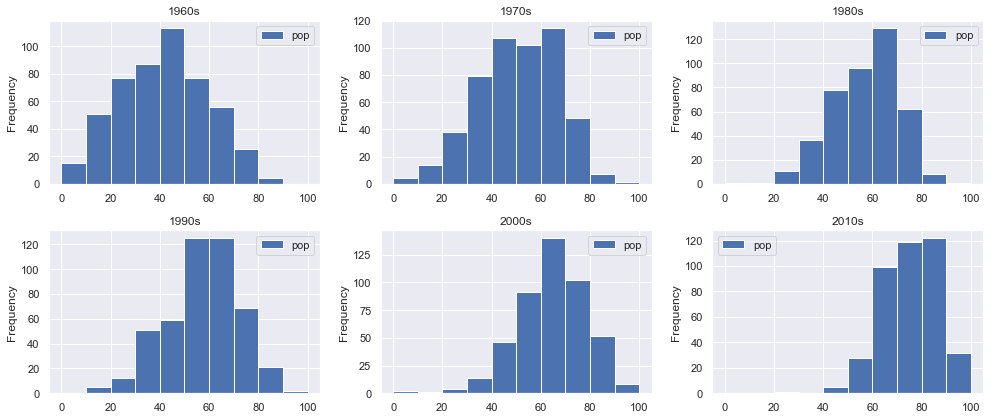

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14, 6))
dec = np.unique(final_frame['decade'])
idx=0
for i in range(2):
    for j in range(3):
        final_frame[final_frame['decade']==dec[idx]].pivot_table('pop',index='s_name',aggfunc=np.mean).plot(kind='hist',
                                                                                                            bins=list(range(0,101,10))
                                                                                                            ,ax= axes[i,j])
        axes[i,j].set_title(dec[idx])
        idx = idx + 1
fig.tight_layout()

### Type

Bellow we can see how the different formations changed over time, with the number of singers involved growing almost 2x, while bands/groups is less than half of what it used to be.
This trend correlates with the decrease of rock n roll and the rise of R&B, hip hop, dance pop, pop...Now, to explain why those genres are having more individual singers than groups like TLC, Boyz II Men, NWA, or a boy band is beyond the scope of this project.

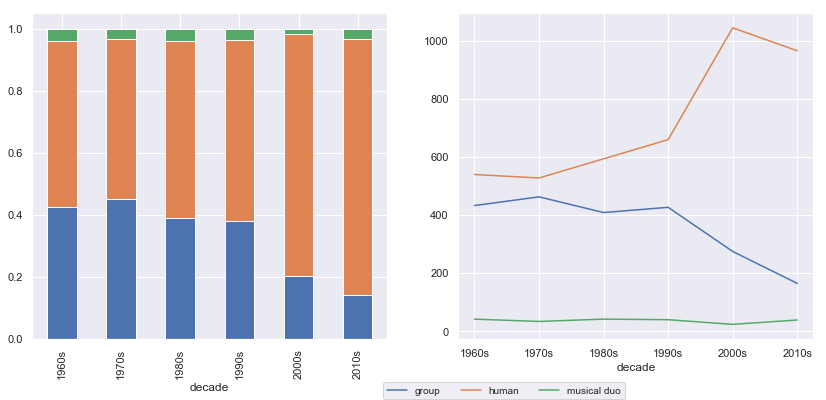

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
pd.crosstab(final_frame.decade,final_frame.type,normalize='index').plot(kind='bar',stacked=True,ax=axes[0],legend=False)
final_frame.pivot_table('year',index='decade',columns='type',aggfunc='count',fill_value=0).plot(ax=axes[1],legend=False)
handles, labels = axes[1].get_legend_handles_labels()
plt.gca().set_xticklabels(['None','1960s','1970s','1980s','1990s','2000s','2010s'])
fig.legend(handles, labels, loc='lower center',fontsize='small',bbox_to_anchor=(0.5, -0.01),ncol=4)

### Gender

Taking a closer look to the 10 most appearances being lead singer/band table, it is possible to see that was not until the 1990s that women started to have more presence at the top, despite being in the first position since the 80s. From the 60s to the 80s there were only Brenda Lee, The Sumpremes, Karen was part of Carpenters duo and Madonna. Now, from the 90s on there were at least 4 women in the 10 most appearances.
Now, let's see if this trend is the same when all the artists are considered, not only the ones on the top.


Bands, duos or any kind of groups are not being considered, only solo singers.

Bellow there are two graphs showing the participation of female, male or others in songs throughout the decades. It is that first way to analyse that we talked about, where if Rihanna appeared in 30 songs in the 2010s, she will add up 30 to the count of female appearances.

Women's appearance went from 20% in the 1960s to almost half of 1990s, reaching its peak, when started to decline and stabilized around 33%, a bit lower than the 80s.

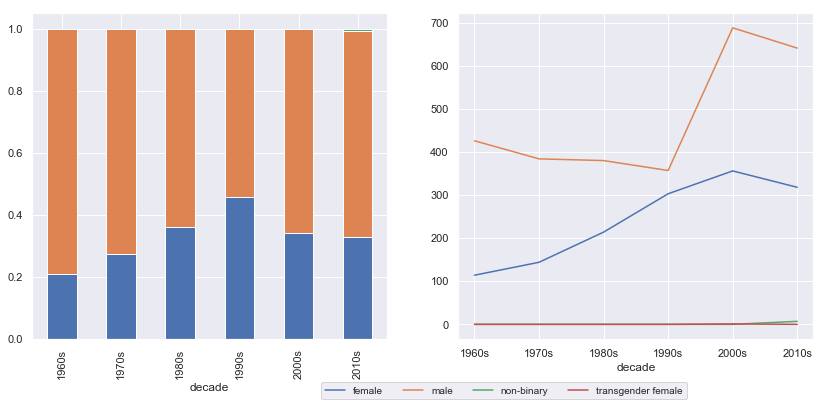

In [407]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
pd.crosstab(final_frame.decade,final_frame.gender,normalize='index').plot(kind='bar',stacked=True,ax=axes[0],legend=False)
final_frame.pivot_table('year',index='decade',columns='gender',aggfunc='count',fill_value=0).plot(ax=axes[1],legend=False)
handles, labels = axes[1].get_legend_handles_labels()
plt.gca().set_xticklabels(['None','1960s','1970s','1980s','1990s','2000s','2010s'])
fig.legend(handles, labels, loc='lower center',fontsize='small',bbox_to_anchor=(0.5, -0.01),ncol=4)


In [18]:
# creating a table with unique artists and their genders
table_gender = final_frame.groupby(['decade','gender'])['s_name'].nunique().unstack(fill_value=0)

Since the two graphs above take into consideration the number of appearances, one could want to see how genders would behave if we take into consideration only the number of artists of each decade, as you can have seen not a big change in the number of female singers, just an increase of songs per artist. For example, in the 1960s Brenda Lee had 11 appearances, while in the 2010s Rihanna had 30, same number of female singers, different number of songs each one have participated in.

What we can see bellow is that there were no big differences in terms of percentage of each gender. The only decades that could be mentioned are the 90s, where 41% of singers were females (graph bellow) vs 46% of female participation in songs(graph above), and the 2010s, where we had a 28% vs 33% situation. 


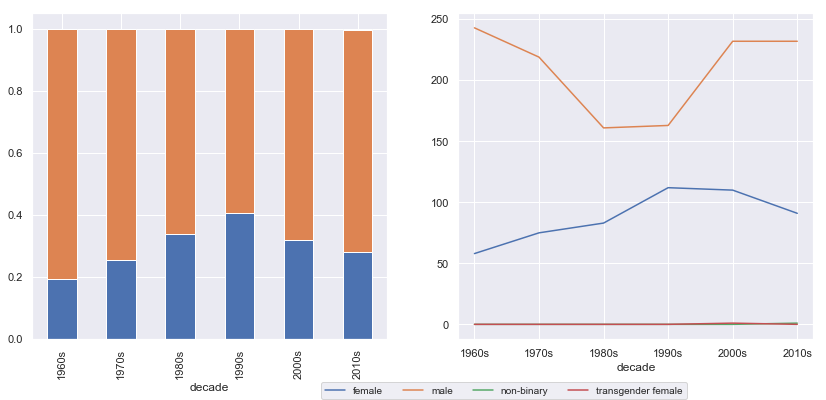

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
table_gender.div(table_gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0],legend=False)
final_frame.groupby(['decade','gender'])['s_name'].nunique().unstack(fill_value=0).plot(ax=axes[1],legend=False)
handles, labels = axes[1].get_legend_handles_labels()
plt.gca().set_xticklabels(['None','1960s','1970s','1980s','1990s','2000s','2010s'])
fig.legend(handles, labels, loc='lower center',fontsize='small',bbox_to_anchor=(0.5, -0.01),ncol=4)

### Age

The table bellow shows the median, minimum and maximum age of solo singers over the decades, but like in the first way to analyse the data frame we talked about, which counts artists more than one time, so again, since Rihanna had 30 songs in the 2010s, she will appear 30 times in the list.

In [421]:
# Despite some people appearing in the Billboard's lists with more than 50 years old, we will soon see that this is a rare phenomenon
final_frame[final_frame['type']=='human'].pivot_table('age',index='decade',aggfunc=[np.median,np.min,np.max])

,median,amin,amax
,age,age,age
decade,,,
1960s,26.0,13.0,68.0
1970s,30.0,14.0,59.0
1980s,33.0,16.0,53.0
1990s,28.0,15.0,57.0
2000s,28.0,12.0,70.0
2010s,28.0,16.0,73.0


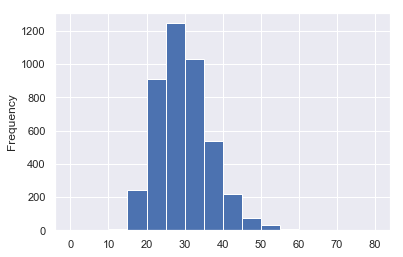

In [99]:
# Billboard's songs is very concentrated in artists between 20 and 40 years old
final_frame[final_frame['type']=='human']['age'].plot(kind='hist',bins=list(range(0,81,5)))

In [100]:
# We can see some differences in median age of genders is some decades, but for now we are not going to see how significant
# they are
final_frame.pivot_table('age',index='decade',columns='gender',aggfunc=np.median,fill_value=0)

gender,female,male,non-binary,transgender female
decade,,,,
1960s,22,27,0,0
1970s,29,30,0,0
1980s,30,34,0,0
1990s,27,29,0,0
2000s,24,29,0,18
2010s,26,29,23,0


### Country

In [114]:
# creating a column to plot countries after
final_frame['country_graph'] = np.nan

In [115]:
final_frame['country'].value_counts()

USA                                 5206
UK                                   745
Canada                               234
NaN                                  109
Australia                             65
Barbados                              46
Jamaica                               40
Sweden                                36
Germany                               32
Trinidad and Tobago                   30
Ireland                               27
France                                24
Cuba                                  21
Spain                                 17
Netherlands                           16
Colombia                               8
Italy                                  7
Denmark                                7
Brazil                                 7
Belgium                                6
Puerto Rico                            6
New Zealand                            4
Norway                                 4
Morocco                                3
Haiti           

In [116]:
# since there are way too many countries to plot, this function will help us to separate them in USA,UK,Canada and Others
def c_map(x):
    if x in ['USA','UK','Canada']:
        return x
    elif x =='NaN':
        return np.nan
    else:
        return 'Others'

In [117]:
final_frame['country_graph'] = final_frame['country'].map(c_map)

In [118]:
# Again, table bellow uses the firts type of analysis we talked about
final_frame.pivot_table('year',index='decade',columns='country_graph',aggfunc='count')

country_graph,Canada,Others,UK,USA
decade,,,,
1960s,6,24,102,854
1970s,31,28,165,768
1980s,25,63,240,700
1990s,43,82,102,886
2000s,44,73,31,1191
2010s,85,162,105,807


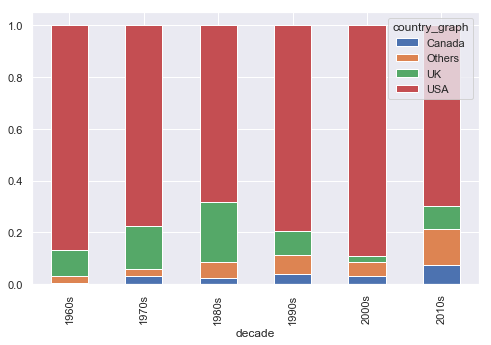

In [446]:
pd.crosstab(final_frame.decade,final_frame.country_graph,normalize='index').plot(kind='bar',stacked=True)

### Genres

Let's say we have two songs, 'Somebody to Love' from Queen and 'Unwell' from Matchbox 20. The question would be: How many times 'rock', for example, appears as a music genre from the artists responsible for those songs? 

*list of their genres in the next two cells

We are going to count music genres in two distinct ways:

1) Genre has to be an exact match to count. For example, 'rock' would only count once, as only Queen has this classification. In this case 'pop rock' from Matchbox wouldn't be considered.

2) The word we are looking for is present in the genre name. For example, now the count would be 2, because 'pop rock' has the word 'rock'. Here we are looking for the different type os rock.

Of course if there is a band with a list of music genres like 'soft rock', 'album rock', 'folk rock', 'pop rock' and 'rock', it would count as only one

In [109]:
# Queen music genres
final_frame.loc[1605,'gen']

('glam rock', 'rock')

In [102]:
# Matchbox 20 music genres
final_frame.loc[4146,'gen']

('neo mellow', 'pop rock', 'post-grunge')

In [32]:
# fuction that counts how many times a genre appears in a year
def genre_plot(list_genres,cond):
    genres = []
    frequency = []
    years = []
    for gen in list_genres:
        for year in list_year:
            freq = 0
            # match exactly with our search. As said before, 'rock' will only match 'rock','pop' with 'pop'...
            if cond == 0:
                for list_gen in years_frame[year]['gen']:
                    if type(list_gen) == tuple:
                        for i in list_gen:
                            if gen == i:
                                freq = freq + 1
                                break
            # 'Rock' matchs 'pop rock', 'soft rock'...'pop' matchs 'dance pop', 'pop rock', and so on 
            else:            
                for list_gen in years_frame[year]['gen']:
                    if type(list_gen) == tuple:
                        for i in list_gen:
                            if gen in i:
                                freq = freq + 1
                                break
            genres.append(gen)
            frequency.append(freq)
            years.append(year)
    
    df_genres = pd.DataFrame({'year':years,'genres':genres,'freq':frequency})
    sns.lineplot(x='year', y='freq',hue='genres',data=df_genres)
   

In [26]:
# creating a dict with a data frame of each year from 1960 to 2017.
years_frame = dict(list(final_frame.groupby('year')))

In [31]:
# unique years from 1960 to 2017
list_year = np.unique(final_frame['year'])

Brief description of two music genres from the next graph:

- Mellow Gold as in SoundLive: contains elements of soft rock and folk rock, and has a strong correlation with album-oriented classic rock of the ‘60s, ‘70s, and ‘80s. Emphasis is on clean production, harmonies, and melodic compositions. <br>Example: Bee Gees, Wings...

- Brill Building Pop as in Wikipedia: is a subgenre of pop music originating from the Brill Building in New York City, where numerous teams of professional songwriters penned material for girl groups and teen idols in the early 1960s.
<br>Example: The Supremes, Brenda Lee, The Beach Boys...


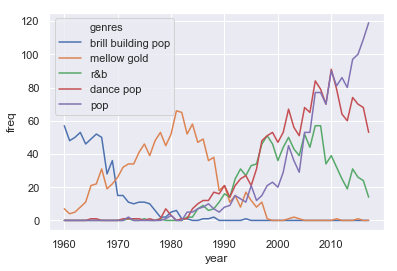

In [119]:
# main genres per decade and its evolution in time
genres = ['brill building pop','mellow gold','r&b','dance pop','pop']
genre_plot(genres,0)

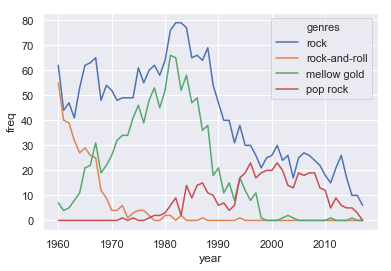

In [40]:
# The fall of rock in popular taste
genres = ['rock','rock-and-roll','mellow gold','pop rock']
genre_plot(genres,1)

##  Analysing tracks

Using Spotify API to get audio features.

link with every feature description:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [124]:
# for this part we will only consider top 10 songs of each year from 1960 to 2017
top_10 = final_frame[(final_frame['rank']<=10)&(final_frame['feat']==0)].copy()

In [125]:
top_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 6583
Data columns (total 20 columns):
link_a        580 non-null object
year          580 non-null int64
decade        580 non-null object
rank          580 non-null int64
names         580 non-null object
track         580 non-null object
feat          580 non-null int64
s_name        580 non-null object
id            562 non-null object
gen           562 non-null object
followers     562 non-null float64
pop           562 non-null float64
w_name        580 non-null object
birth         561 non-null datetime64[ns]
country       580 non-null object
gender        352 non-null object
type          580 non-null object
link_wdata    580 non-null object
prep_age      561 non-null object
age           561 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(13)
memory usage: 95.2+ KB


In [134]:
# Adjustements to get the right tracks
top_10.loc[607,'s_name'] = 'Sgt. Barry Sadler'
top_10.loc[1638,'s_name'] = 'Walter Murphy'
top_10.loc[2041,'track'] = 'Another Brick in the Wall, Pt. 2'

In [282]:
# first we search for the track and see if it is by the artist we want
def get_track(track,artist,decade):
    previa = sp.search(q=track,type='track',limit=50)['tracks']['items']
    for i in range(len(previa)):
        if artist in previa[i]['artists'][0]['name'] and re.sub(r'\(.*?\)',"",track).strip().lower() in previa[i]['name'].lower():
            return previa[i]['id']
        
        # If we couldn't make this match, we'll try again with another type of search
        if i == len(previa) - 1:
            return get_track_2(artist,track)

In [136]:
# in this second search, we look for the artists' top tracks and see if we can find a match with the song from our data frame
def get_track_2(artist,track):
    art_id = sp.search(q=artist,type='artist')['artists']['items'][0]['id']
    previa_music = sp.artist_top_tracks(art_id)['tracks']
    for item in range(len(previa_music)):
        if re.sub(r'\(.*?\)',"",track).strip().lower() in previa_music[item]['name'].lower():
            return previa_music[item]['id']

In [137]:
def to_dict(track_id,frame_idx):
    if track_id != None:
        aud_feat = sp.audio_features(track_id)[0]     
        dict_tracks[track] = aud_feat
        aud_feat['decade'] = decade
        aud_feat['t_track'] = track
        aud_feat['t_artist'] = artist
        spotify_names = sp.track(track_id)
        aud_feat['s_artist'] = spotify_names['artists'][0]['name']
        aud_feat['s_track'] = spotify_names['name']
    

In [283]:
dict_tracks = {}

In [284]:
for idx in top_10.index:
    track = top_10.loc[idx,'track']
    if '/' in track:
        track = track.split('/')[0].strip()
    artist = top_10.loc[idx,'s_name']
    decade = top_10.loc[idx,'decade']
    t_id = get_track(track,artist,decade)
    to_dict(t_id,idx)

In [285]:
final_track = pd.DataFrame.from_dict(dict_tracks,orient='index')

In [286]:
# 18 songs are missing, since there were 580 entries in the top 10 data frame, but...
final_track.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, (Everything I Do) I Do It for You to You've Lost That Lovin' Feelin'
Data columns (total 23 columns):
danceability        562 non-null float64
energy              562 non-null float64
key                 562 non-null int64
loudness            562 non-null float64
mode                562 non-null int64
speechiness         562 non-null float64
acousticness        562 non-null float64
instrumentalness    562 non-null float64
liveness            562 non-null float64
valence             562 non-null float64
tempo               562 non-null float64
type                562 non-null object
id                  562 non-null object
uri                 562 non-null object
track_href          562 non-null object
analysis_url        562 non-null object
duration_ms         562 non-null int64
time_signature      562 non-null int64
decade              562 non-null object
t_track             562 non-null object
t_artist            562 non-null ob

In [287]:
# since the missing songs are spread out over the decades, they will not have a big impact in our analysis
final_track.pivot_table('id',index='decade',aggfunc='count')

,id
decade,
1960s,96
1970s,97
1980s,96
1990s,96
2000s,99
2010s,78


In [137]:
final_track = pd.read_pickle('final_track.csv')

In [139]:
diff_songs = []

In [140]:
for item in final_track.index:
    if final_track.loc[item,'t_track'].lower() != final_track.loc[item,'s_track'].lower():
        diff_songs.append(item)

In [141]:
len(diff_songs)

122

In [143]:
# The differences between the names of the songs we searched (t_track) for and the ones returned by Spotify (s_track) are mainly
# due to specifying version and artists featuring those songs. All is well to continue
final_track.loc[diff_songs,['t_track','t_artist','s_artist','s_track']][:5]

,t_track,t_artist,s_artist,s_track
(I Can't Get No) Satisfaction,(I Can't Get No) Satisfaction,The Rolling Stones,The Rolling Stones,(I Can't Get No) Satisfaction - Mono Version
"1, 2 Step","1, 2 Step",Ciara,Ciara,"1, 2 Step - Main"
Abracadabra,Abracadabra,Steve Miller Band,Steve Miller Band,Abracadabra - Remastered 2017
Against All Odds (Take a Look at Me Now),Against All Odds (Take a Look at Me Now),Phil Collins,Phil Collins,Against All Odds (Take A Look At Me Now) - 201...
Airplanes,Airplanes,B.o.B,B.o.B,Airplanes (feat. Hayley Williams)


In [304]:
from math import floor

In [305]:
# function to change track duration from miliseconds to minutes
def time(x):
    total_s = x/1000
    minutes = total_s//60
    seconds = floor(total_s%60)/100
    return minutes + seconds

In [306]:
final_track['duration_m'] = final_track['duration_ms'].apply(time)

In [307]:
final_track['link_spotify'] = 'https://open.spotify.com/track/' + final_track['id']

In [308]:
table_decades = final_track.pivot_table(values=['danceability', 'energy','loudness','speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_m'],index='decade',aggfunc = np.median)

In [309]:
titles = table_decades.columns

Bellow we see how different characteristics of tracks changed ove time. Once again, a more detailed description of each of them can be found in:  https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

I think that 'valence' is the less clear feature, so it is worth reading Spotify's definition: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In general, music got more danceable, louder and energetic


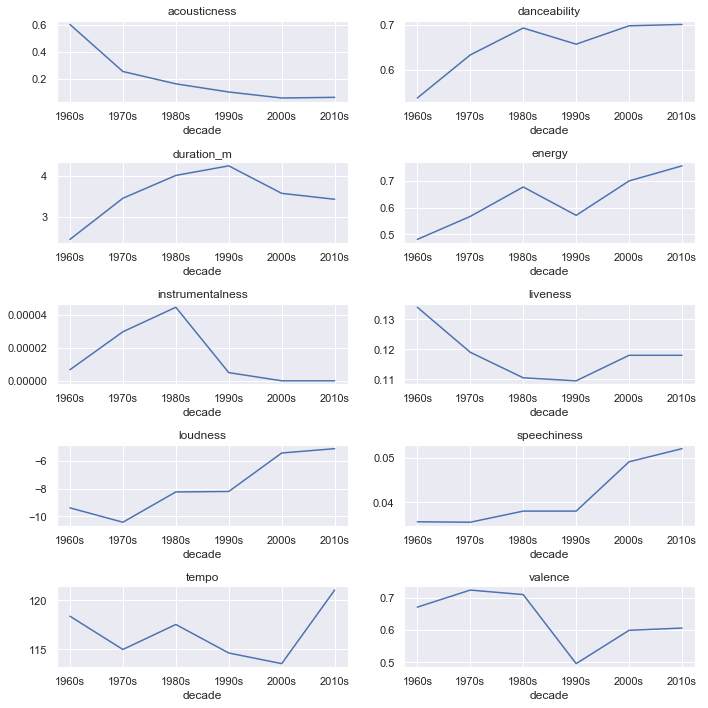

In [310]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(10, 10))
idx = 0
for i in range(5):
    for j in range(2):
        sns.lineplot(x=table_decades[titles[idx]].index,y=table_decades[titles[idx]].values,ax=axes[i,j])
        axes[i,j].set_title(titles[idx])
        idx = idx + 1
fig.tight_layout()

In [311]:
def make_clickable(val):
    return '<a href="{}">{}</a>'.format(val,val)

In [158]:
# allow link_spotify to be fully shown in the next tables
pd.set_option('max_colwidth',60)

Some examples to hear the difference between extremes of some features

In [312]:
# songs with more danceability
final_track[['t_artist','danceability','link_spotify']].nlargest(5,'danceability').style.format({'link_spotify': make_clickable})

,t_artist,danceability,link_spotify
SexyBack,Justin Timberlake,0.969,https://open.spotify.com/track/6yIsmZmxtmDIwOVpID1wY3
Hot in Herre,Nelly,0.965,https://open.spotify.com/track/04KTF78FFg8sOHC1BADqbY
Temperature,Sean Paul,0.951,https://open.spotify.com/track/0k2GOhqsrxDTAbFFSdNJjT
"1, 2 Step",Ciara,0.939,https://open.spotify.com/track/72vWmeqYcT1irKClpbenQm
Baby Got Back,Sir Mix-A-Lot,0.933,https://open.spotify.com/track/1SAkL1mYNJlaqnBQxVZrRl


In [313]:
# songs with less danceability
final_track[['t_artist','danceability','link_spotify']].nsmallest(5,'danceability').style.format({'link_spotify': make_clickable})

,t_artist,danceability,link_spotify
Bridge over Troubled Water,Simon & Garfunkel,0.149,https://open.spotify.com/track/6l8EbYRtQMgKOyc1gcDHF9
(You're My) Soul and Inspiration,The Righteous Brothers,0.166,https://open.spotify.com/track/5ZHOiRqKOzgFMfMAu8cwzp
Theme from A Summer Place,Percy Faith,0.213,https://open.spotify.com/track/369DA2r2Ycpk8DjJGVIU9S
The End of the World,Skeeter Davis,0.232,https://open.spotify.com/track/5DTOOkooKFUvWj1XQTFa09
Here I Go Again,Whitesnake,0.234,https://open.spotify.com/track/567EwOGPAXg7Y9DQZTEFEE


In [314]:
# songs with more energy
final_track[['t_artist','energy','link_spotify']].nlargest(5,'energy').style.format({'link_spotify': make_clickable})

,t_artist,energy,link_spotify
When Doves Cry,Prince,0.989,https://open.spotify.com/track/51H2y6YrNNXcy3dfc3qSbA
Hey Ya!,OutKast,0.974,https://open.spotify.com/track/2PpruBYCo4H7WOBJ7Q2EwM
Miss You Much,Janet Jackson,0.971,https://open.spotify.com/track/062mh4qAZyDV9dIQK70iu0
Promiscuous,Nelly Furtado,0.97,https://open.spotify.com/track/2gam98EZKrF9XuOkU13ApN
Livin' la Vida Loca,Ricky Martin,0.954,https://open.spotify.com/track/0Ph6L4l8dYUuXFmb71Ajnd


In [316]:
# songs with less energy
final_track[['t_artist','energy','link_spotify']].nsmallest(5,'energy').style.format({'link_spotify': make_clickable})

,t_artist,energy,link_spotify
The First Time Ever I Saw Your Face,Roberta Flack,0.0264,https://open.spotify.com/track/0SxFyA4FqmEQqZVuAlg8lf
Teen Angel,Mark Dinning,0.0602,https://open.spotify.com/track/1m8QTPus7fbdkCiOG29Wmb
Foolish Games,Jewel,0.0735,https://open.spotify.com/track/6Ee5Y6kCdlZfoFhyR8xPVt
I Can't Stop Loving You,Ray Charles,0.123,https://open.spotify.com/track/44Nyq6PqtAoHwxZ0jzA6aw
Three Times a Lady,Commodores,0.126,https://open.spotify.com/track/0wncUWg5piLmDhn8wry8jM


In [317]:
# positive songs 
final_track[['t_artist','valence','link_spotify']].nlargest(5,'valence').style.format({'link_spotify': make_clickable})

,t_artist,valence,link_spotify
Every Morning,Sugar Ray,0.975,https://open.spotify.com/track/2ouURa1AIXp3AvkS52Jry5
Addicted to Love,Robert Palmer,0.973,https://open.spotify.com/track/5izGeTxueiFX1UPFGohY9w
I Gotcha,Joe Tex,0.972,https://open.spotify.com/track/15en5xAk3uORkyA01e6pIO
Like a Virgin,Madonna,0.971,https://open.spotify.com/track/1ZPlNanZsJSPK5h9YZZFbZ
My Boyfriend's Back,The Angels,0.971,https://open.spotify.com/track/67BcW3iQrCTQlADKiLG6Fc


In [318]:
# sad songs
final_track[['t_artist','valence','link_spotify']].nsmallest(5,'valence').style.format({'link_spotify': make_clickable})

,t_artist,valence,link_spotify
I Believe I Can Fly,R. Kelly,0.0438,https://open.spotify.com/track/2RzJwBCXsS1VnjDm2jKKAa
You Light Up My Life,Debby Boone,0.0685,https://open.spotify.com/track/3dFR132gzO8jxD57R2gid3
The Reason,Hoobastank,0.0695,https://open.spotify.com/track/1lHtE5JDCas1EwXhQIMOIj
Apologize,Timbaland,0.0872,https://open.spotify.com/track/76MdMwQ4yiw1wIbA16sOrA
My Love,Wings,0.0911,https://open.spotify.com/track/0yQ5bLeZvmhPSAK5v5aDk0


In [319]:
# fast tempo
final_track[['t_artist','tempo','link_spotify']].nlargest(5,'tempo').style.format({'link_spotify': make_clickable})

,t_artist,tempo,link_spotify
It's Too Late,Carole King,208.282,https://open.spotify.com/track/12q3V8ShACq2PSWINMc2rC
Somethin' Stupid,Frank Sinatra,207.431,https://open.spotify.com/track/4feXcsElKIVsGwkbnTHAfV
Vision of Love,Mariah Carey,205.362,https://open.spotify.com/track/0gLQ6jhJsyYfl7PrD1RZ7X
I Wanna Sex You Up,Color Me Badd,201.868,https://open.spotify.com/track/5HVFCfCheCgvK6sn27ZlKn
I Can't Stop Loving You,Ray Charles,199.843,https://open.spotify.com/track/44Nyq6PqtAoHwxZ0jzA6aw


In [320]:
# slow tempo
final_track[['t_artist','tempo','link_spotify']].nsmallest(5,'tempo').style.format({'link_spotify': make_clickable})

,t_artist,tempo,link_spotify
Without You,Harry Nilsson,65.311,https://open.spotify.com/track/7vqubB6rY1NpGVGpHYobbQ
I Will Always Love You,Whitney Houston,66.98,https://open.spotify.com/track/4eHbdreAnSOrDDsFfc4Fpm
How Can You Mend a Broken Heart,Bee Gees,68.541,https://open.spotify.com/track/1jy0RbDHyBMTupSdc98XbG
Crying in the Chapel,Elvis Presley,71.274,https://open.spotify.com/track/1Vzr9AOdHw65UHoK1Vuxls
Stranger on the Shore,Acker Bilk,71.278,https://open.spotify.com/track/6EwVwaoy9j9mfKAvksVwC8


Before we finish, just one last thing that caught my attention. 'Valence' reached its bottom at the 1990s, but that is not how I remembered those days. Let's have a closer look.

In [322]:
# Out of the 96 songs we have from the 90s, 49 of them can be considered sad, depressed or angry (less then 0.5 of valence)
final_track[final_track['valence']<0.5].pivot_table(values='key',index='decade',aggfunc='count')

,key
decade,
1960s,19
1970s,28
1980s,27
1990s,49
2000s,35
2010s,29


In [323]:
# Looking at those songs, almost none can be considered angry, in my opinion, so the 90s were the era of sad and depressed songs
final_track.loc[(final_track['valence']<0.5)&(final_track['decade']=='1990s'),['t_artist','valence','link_spotify']].style.format({'link_spotify': make_clickable})

,t_artist,valence,link_spotify
(Everything I Do) I Do It for You,Bryan Adams,0.303,https://open.spotify.com/track/1Eb90nmqTrxylKFhcUzW8P
All My Life,K-Ci & JoJo,0.18,https://open.spotify.com/track/5GorFaKkP2mLREQvhSblIg
All for Love,Bryan Adams,0.119,https://open.spotify.com/track/0T4wPYibBqtaiiPFuVyqlY
Always Be My Baby,Mariah Carey,0.488,https://open.spotify.com/track/2aBxt229cbLDOvtL7Xbb9x
Angel of Mine,Monica,0.208,https://open.spotify.com/track/1AM1o0mKbgAK5oMpY8B3Z7
Another Day in Paradise,Phil Collins,0.365,https://open.spotify.com/track/1NCuYqMc8hKMb4cpNTcJbD
Because You Loved Me,Céline Dion,0.161,https://open.spotify.com/track/4qhkS0lRL2GgDxpuIr2Mbb
Believe,Cher,0.459,https://open.spotify.com/track/2goLsvvODILDzeeiT4dAoR
Blaze of Glory,Jon Bon Jovi,0.37,https://open.spotify.com/track/1sUTfgduT0WIQO8kXKXxLC
Breathe Again,Toni Braxton,0.259,https://open.spotify.com/track/68ZD7M5tOBBM0N5XWRECoD


## Conclusion and final considerations

Summarizing what we have seen:
 
- As expected, nothing lasts forever. Singers/bands/duos and genres ended up losing popularity over time 
- Not always the artists with big success in Billboard's lists are the most popular ones today in Spotify
- Despite the increase in participation of female singers in the lists, it is still around 30% 
- The majority of songs have mostly singers from 20 to 40 years old participating in it
- Songs are mostly from americans, being their worst performance in the 80s with a share of 68%
- Songs are getting more danceable, louder and energetic
- The 90s were the era where sad and depressed singles reached the top

Hope you have enjoyed this notebook and if you have seen something wrong or want to make any contribution, please don't hesitate to make comments.